In [1]:
# pip install fast_ml

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from fast_ml.model_development import train_valid_test_split
import warnings
warnings.filterwarnings("ignore")

In [3]:
def displayInfo (training, edge1, edge2, edge3, edge4):
    print ("Precision on Training Data: ", training)
    print ("Precision on edge1 Data: ", edge1)
    print ("Precision on edge2 Data: ", edge2)
    print ("Precision on edge3 Data: ", edge3)
    print ("Precision on edge4 Data: ", edge4)

In [4]:
def calculateAccuracy (Y_predicted, Y_true, datasetType: str, model):
    if datasetType == "Categorical":
        return metrics.precision_score(Y_true, Y_predicted,average='macro')
    return metrics.mean_squared_error(Y_true, Y_predicted)

In [5]:
def trainCategoricalModel (X,Y):
    return LogisticRegression().fit(X, Y)

In [6]:
def trainCatergoricalModel_ (X,Y):
    return GaussianNB().fit(X, Y)

In [7]:
def trainCatModel (X,Y):
    model  = svm.SVC(kernel='linear')
    return model.fit(X, Y)

In [8]:
def trainContinuousModel (X,Y):
    return LinearRegression().fit(X, Y)

In [9]:
def trainContinuousModel_ (X,Y):
    Y = Y.astype('int')
    model = KNeighborsClassifier(n_neighbors=1)
    return model.fit(X,Y)

In [10]:
def trainConModel(X,Y):
    Y = Y.astype('int')
    model = RandomForestRegressor(n_estimators= 1000, random_state=42)
    return model.fit(X,Y)

In [11]:
def runModel(model, X_test, Y_test,datasetType: str): 
    Y_predicted = model.predict(X_test)
    return calculateAccuracy (Y_predicted, Y_test,datasetType, model)

In [12]:
def loadData (df,predictName: str,datasetType: str):
    
    X = df.drop(columns=[predictName])  
    y = df[predictName]      

     # First split: Split data into two halves (50% training and 50% for further splits)
    model_train_X, X_remaining, model_train_Y, y_remaining = train_test_split(X, y, train_size=0.5, random_state=42)
    
    # Second split: Split the remaining data into 2 (50% for edge server 1 and 50% for edge server 2)
    edgeServer1_X, edgeServer2_X, edgeServer1_Y, edgeServer2_Y = train_test_split(X_remaining, y_remaining, train_size=0.5, random_state=42)
    
    # Third split: Split the remaining data into 2 (50% for edge server 3 and 50% for edge server 4)
    edgeServer3_X, edgeServer4_X, edgeServer3_Y, edgeServer4_Y = train_test_split(X_remaining, y_remaining, train_size=0.5, random_state=42)
    
    model_train_X, model_train_Y, edgeServer1_X, edgeServer1_Y, edgeServer2_X, edgeServer2_Y = train_valid_test_split(df, target = predictName, 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)
    
    print ("Actual Model \n")
   # print (model_train_X.describe(include = 'all'),"\n")
    print (model_train_X.corr(),"\n")
    print (model_train_X.corrwith(model_train_Y))
    #print (model_train_Y.describe(include = 'all'))
    
    print ("-----------------------------------------------------")
    
    print ("Edge Server 1 Model \n")
    #print (edgeServer1_X.describe(include = 'all'))
    print (edgeServer1_X.corr())
    print (edgeServer1_X.corrwith(edgeServer1_Y))
    #print (edgeServer1_Y.describe(include = 'all'))
    
    print ("-----------------------------------------------------")
    
    print ("Edge Server 2 Model \n")
    #print (edgeServer2_X.describe(include = 'all'))
    print (edgeServer2_X.corr())
    print (edgeServer2_X.corrwith(edgeServer2_Y))
    #print (edgeServer2_Y.describe(include = 'all'))
    
    print ("-----------------------------------------------------")

    print ("Edge Server 3 Model \n")
    #print (edgeServer2_X.describe(include = 'all'))
    print (edgeServer3_X.corr())
    print (edgeServer3_X.corrwith(edgeServer3_Y))
    # print (edgeServer2_Y.describe(include = 'all'))
    
    print ("-----------------------------------------------------")

    # print ("Edge Server 4 Model \n")
    # #print (edgeServer2_X.describe(include = 'all'))
    # print (edgeServer4_X.corr())
    # print (edgeServer4_X.corrwith(edgeServer4_Y))
    # # print (edgeServer2_Y.describe(include = 'all'))
    
    # print ("-----------------------------------------------------")
     # for the graph
    a = model_train_X.corrwith(model_train_Y)
    b = edgeServer1_X.corrwith(edgeServer1_Y)
    c = edgeServer2_X.corrwith(edgeServer2_Y) 
    d = edgeServer3_X.corrwith(edgeServer3_Y)
    # e = edgeServer4_X.corrwith(edgeServer4_Y)
    
    column_headers = list(model_train_X.columns.values)
    print(column_headers)

    # set width of bar
    barWidth = 0.25
    fig = plt.subplots(figsize =(12, 8))


    # Set position of bar on X axis
    br1 = np.arange(len(a))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]
    br4 = [x + barWidth for x in br3]
    # br5 = [x + barWidth for x in br4]

    # Make the plot
    plt.bar(br1, a, color ='r', width = barWidth,
            edgecolor ='grey', label ='Model')
    plt.bar(br2, b, color ='g', width = barWidth,
            edgecolor ='grey', label ='Edge Server 1')
    plt.bar(br3, c, color ='b', width = barWidth,
            edgecolor ='grey', label ='Edge Server 2')
    plt.bar(br4, d, color ='y', width = barWidth,
            edgecolor ='grey', label ='Edge Server 3')
    # plt.bar(br5, e, color ='b', width = barWidth,
    #         edgecolor ='grey', label ='Edge Server 4')


    # Adding Xticks
    plt.xlabel('Features', fontweight ='bold', fontsize = 15)
    plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
    plt.xticks([r + barWidth for r in range(len(a))], 
               [a for a in column_headers])
    plt.legend()
    plt.show()

    
#    if datasetType == "Categorical":
#         model = trainCategoricalModel (model_train_X, model_train_Y)
#         model_a = trainCatergoricalModel_(model_train_X, model_train_Y)
   #       model_b = trainCatModel(model_train_X, model_train_Y)
 #   else:
#         model = trainContinuousModel (model_train_X, model_train_Y)
#         model_a = trainContinuousModel_(model_train_X, model_train_Y)
  #        model_b = trainConModel(model_train_X, model_train_Y)
        
    #trainingAccuacy, edgeServer1Accuracy, edgeServer2Accuracy = runModel (model, model_train_X, model_train_Y,datasetType), runModel(model,edgeServer1_X, edgeServer1_Y,datasetType), runModel(model,edgeServer2_X, edgeServer2_Y,datasetType)
#   training_A, edgeServer1_A, edgeServer2_A = runModel (model_a, model_train_X, model_train_Y,datasetType), runModel(model_a,edgeServer1_X, edgeServer1_Y,datasetType), runModel(model_a,edgeServer2_X, edgeServer2_Y,datasetType) 
#    training_B, edgeServer1_B, edgeServer2_B = runModel (model_b, model_train_X, model_train_Y,datasetType), runModel(model_b,edgeServer1_X, edgeServer1_Y,datasetType), runModel(model_b,edgeServer2_X, edgeServer2_Y,datasetType) 
    
    
#     return trainingAccuacy, edgeServer1Accuracy, edgeServer2Accuracy
#     return training_A, edgeServer1_A, edgeServer2_A
  #  return training_B, edgeServer1_B, edgeServer2_B
    return 0,0,0,0

In [13]:
# def loadData (df,predictName: str,datasetType: str):

#     X = df.drop(columns=[predictName])  # Features
#     y = df[predictName]                # Target
    
#     # First split: Split data into two halves (50% training and 50% for further splits)
#     model_train_X, X_remaining, model_train_Y, y_remaining = train_test_split(X, y, train_size=0.5, random_state=42)
    
#     # Second split: Split the remaining data into 2 (50% for edge server 1 and 50% for edge server 2)
#     edgeServer1_X, edgeServer2_X, edgeServer1_Y, edgeServer2_Y = train_test_split(X_remaining, y_remaining, train_size=0.5, random_state=42)
    
#     # Third split: Split the remaining data into 2 (50% for edge server 3 and 50% for edge server 4)
#     edgeServer3_X, edgeServer4_X, edgeServer3_Y, edgeServer4_Y = train_test_split(X_remaining, y_remaining, train_size=0.5, random_state=42)
    
#     if datasetType == "Categorical":
#         model = trainCategoricalModel (model_train_X, model_train_Y)
        
#     else:
#         model = trainContinuousModel (model_train_X, model_train_Y)
        
        
#     trainingAccuacy, edgeServer1Accuracy, edgeServer2Accuracy, edgeServer3Accuracy, edgeServer4Accuracy = runModel (model, model_train_X, model_train_Y,datasetType), runModel(model,edgeServer1_X, edgeServer1_Y,datasetType), runModel(model,edgeServer2_X, edgeServer2_Y,datasetType), runModel(model,edgeServer3_X, edgeServer3_Y,datasetType), runModel(model,edgeServer4_X, edgeServer4_Y,datasetType)

#     return trainingAccuacy, edgeServer1Accuracy, edgeServer2Accuracy, edgeServer3Accuracy, edgeServer4Accuracy


In [14]:
def Occupancy():
    print("-------------- Occupancy Dataset Info -------------------- ")
    df = pd.read_csv('C:/Users/m/Downloads/data/Occupancy.csv')
    df.drop(columns = ["date"],inplace = True)
    trainingAccuacy, edgeServer1Accuracy, edgeServer2Accuracy, edgeServer3Accuracy = loadData(df,'Occupancy',"Categorical")

    # trainingAccuacy, edgeServer1Accuracy, edgeServer2Accuracy, edgeServer3Accuracy, edgeServer4Accuracy = loadData(df,'Occupancy',"Categorical")
     
    
   # training_A, edgeServer1_A, edgeServer2_A = loadData (df,'Occupancy',"Categorical")
   # training_B, edgeServer1_B, edgeServer2_B = loadData (df,'Occupancy',"Categorical")
   # displayInfo(trainingAccuacy, edgeServer1Accuracy, edgeServer2Accuracy)
   # print("------------------------------------------------------------")
   # displayInfo(training_A, edgeServer1_A, edgeServer2_A)
   # print("------------------------------------------------------------")
   # displayInfo(training_B, edgeServer1_B, edgeServer2_B)
   # return 

-------------- Occupancy Dataset Info -------------------- 
Actual Model 

               Temperature  Humidity     Light       CO2  HumidityRatio
Temperature       1.000000 -0.152334  0.693067  0.451676       0.212706
Humidity         -0.152334  1.000000 -0.028908  0.303338       0.931679
Light             0.693067 -0.028908  1.000000  0.448797       0.227257
CO2               0.451676  0.303338  0.448797  1.000000       0.482706
HumidityRatio     0.212706  0.931679  0.227257  0.482706       1.000000 

Temperature      0.559570
Humidity         0.047125
Light            0.913254
CO2              0.503470
HumidityRatio    0.261064
dtype: float64
-----------------------------------------------------
Edge Server 1 Model 

               Temperature  Humidity     Light       CO2  HumidityRatio
Temperature       1.000000 -0.196431  0.675734  0.431592       0.147782
Humidity         -0.196431  1.000000 -0.049926  0.253991       0.939135
Light             0.675734 -0.049926  1.000000  0.4346

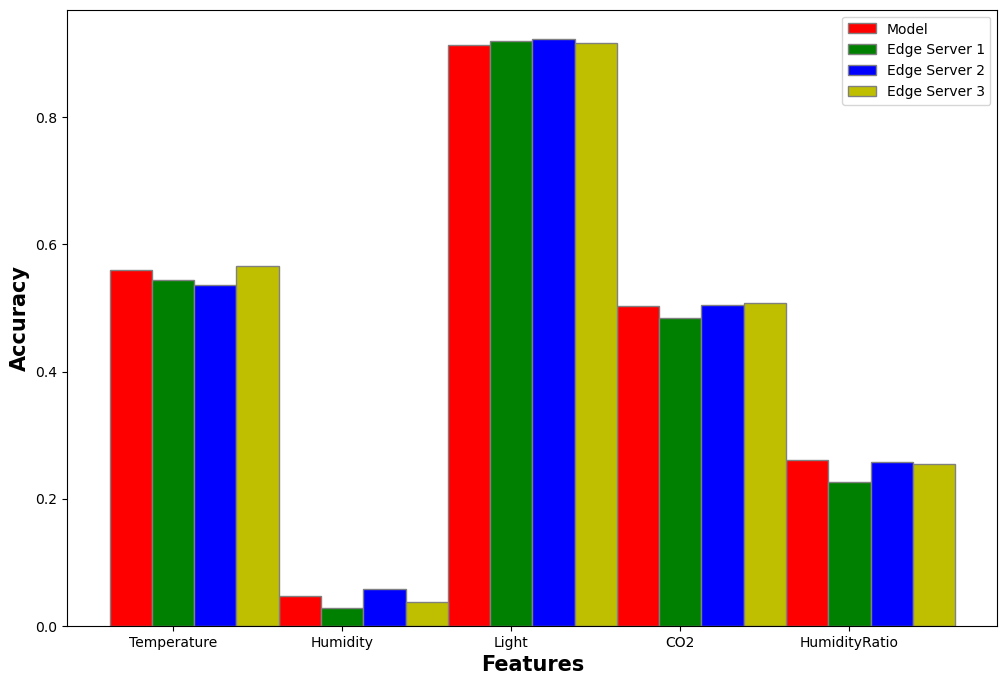

In [15]:
Occupancy()

In [33]:
def powerConsumption():
    print("-------------- Power Consumption Dataset Info -------------------- ")
    df = pd.read_csv('C:/Users/m/Downloads/data/Tetuan City power consumption.csv')
    df.drop(columns = ['DateTime','Zone 2  Power Consumption', 'Zone 3  Power Consumption'],inplace = True)
    trainingAccuacy, edgeServer1Accuracy, edgeServer2Accuracy, edgeServer3Accuracy= loadData(df,'Zone 1 Power Consumption',"Continuous")

    # trainingAccuacy, edgeServer1Accuracy, edgeServer2Accuracy, edgeServer3Accuracy, edgeServer4Accuracy = loadData(df,'Zone 1 Power Consumption',"Continuous")

#     training_A, edgeServer1_A, edgeServer2_A = loadData (df,'Zone 1 Power Consumption',"Continuous")
#     training_B, edgeServer1_B, edgeServer2_B = loadData (df,'Zone 1 Power Consumption',"Continuous")
#     displayInfo(trainingAccuacy, edgeServer1Accuracy, edgeServer2Accuracy)
#     print("------------------------------------------------------------")
#     displayInfo(training_A, edgeServer1_A, edgeServer2_A)
#     print("------------------------------------------------------------")
#     displayInfo(training_B, edgeServer1_B, edgeServer2_B)
#     return 

-------------- Power Consumption Dataset Info -------------------- 
Actual Model 

                       Temperature  Humidity  Wind Speed  \
Temperature               1.000000 -0.460869    0.479941   
Humidity                 -0.460869  1.000000   -0.138894   
Wind Speed                0.479941 -0.138894    1.000000   
general diffuse flows     0.459560 -0.467733    0.136884   
diffuse flows             0.195742 -0.254393    0.001223   

                       general diffuse flows  diffuse flows  
Temperature                         0.459560       0.195742  
Humidity                           -0.467733      -0.254393  
Wind Speed                          0.136884       0.001223  
general diffuse flows               1.000000       0.563813  
diffuse flows                       0.563813       1.000000   

Temperature              0.436739
Humidity                -0.288769
Wind Speed               0.166119
general diffuse flows    0.187384
diffuse flows            0.078865
dtype: float

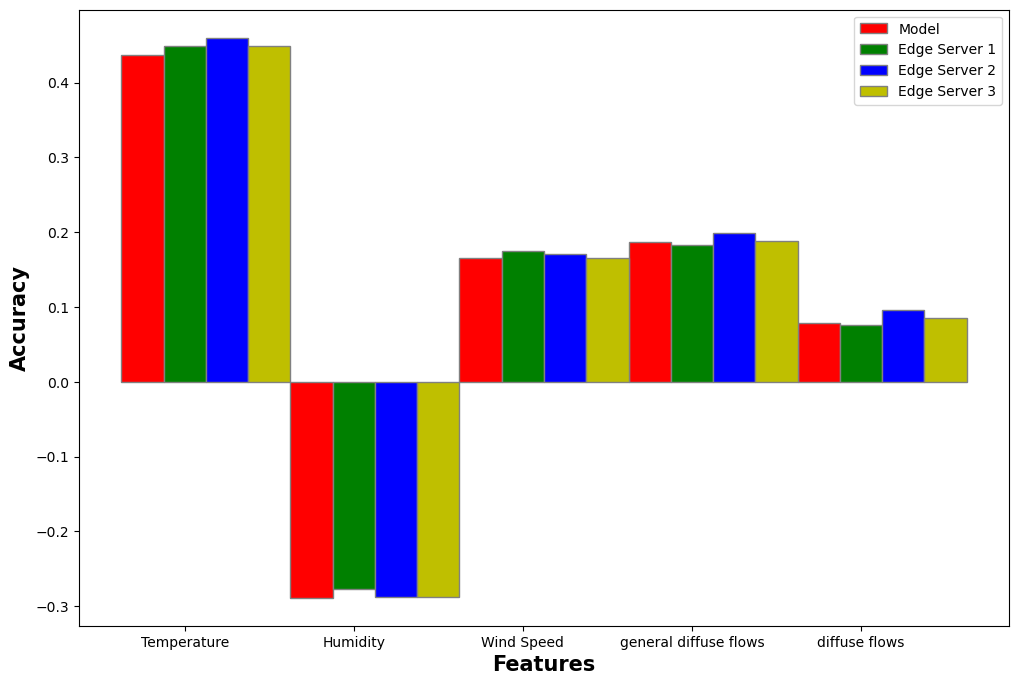

In [35]:
powerConsumption()

In [18]:
def accelerometer_w():
    print("-------------- Accelerometer Dataset Info -------------------- ")
    df = pd.read_csv('C:/Users/m/Downloads/data/accelerometer.csv')
#     df.drop(columns = ['wconfid','pctid', 'x', 'y', 'z'],inplace = True)
    trainingAccuacy, edgeServer1Accuracy, edgeServer2Accuracy, edgeServer3Accuracy, edgeServer4Accuracy = loadData(df,'wconfid',"Continuous")
    
#     training_A, edgeServer1_A, edgeServer2_A = loadData (df,'wconfid',"Continuous")
#     training_B, edgeServer1_B, edgeServer2_B = loadData (df,'wconfid',"Continuous")
#     displayInfo(trainingAccuacy, edgeServer1Accuracy, edgeServer2Accuracy)
#     print("------------------------------------------------------------")
#     displayInfo(training_A, edgeServer1_A, edgeServer2_A)
#     print("------------------------------------------------------------")
#     displayInfo(training_B, edgeServer1_B, edgeServer2_B)
#     return 

-------------- Accelerometer Dataset Info -------------------- 
Actual Model 

          pctid         x         y         z
pctid  1.000000  0.002459  0.002355  0.007228
x      0.002459  1.000000  0.020984 -0.092875
y      0.002355  0.020984  1.000000 -0.024564
z      0.007228 -0.092875 -0.024564  1.000000 

pctid   -0.001018
x       -0.005061
y        0.006905
z        0.004140
dtype: float64
-----------------------------------------------------
Edge Server 1 Model 

          pctid         x         y         z
pctid  1.000000 -0.003047 -0.008552  0.016268
x     -0.003047  1.000000  0.037724 -0.082484
y     -0.008552  0.037724  1.000000 -0.010670
z      0.016268 -0.082484 -0.010670  1.000000
pctid   -0.002004
x       -0.001950
y        0.009377
z       -0.003587
dtype: float64
-----------------------------------------------------
Edge Server 2 Model 

          pctid         x         y         z
pctid  1.000000  0.004595  0.017928  0.015438
x      0.004595  1.000000  0.005882 -0.08

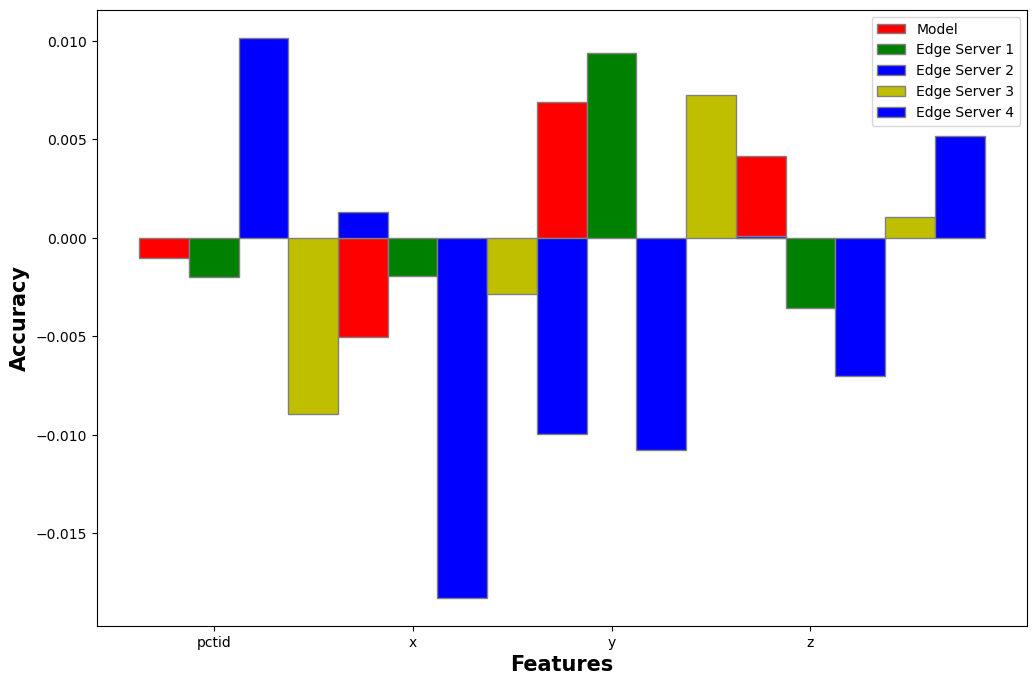

In [19]:
accelerometer_w()

In [20]:
def activity_wsdata():
    print("-------------- Wearable Sensor Dataset Info -------------------- ")
    df = pd.read_csv('C:/Users/m/Downloads/data/activity data.csv')
    trainingAccuacy, edgeServer1Accuracy, edgeServer2Accuracy, edgeServer3Accuracy, edgeServer4Accuracy = loadData(df,'activity',"Categorical")
    
#     training_A, edgeServer1_A, edgeServer2_A = loadData (df,'activity',"Categorical")
#     training_B, edgeServer1_B, edgeServer2_B = loadData (df,'activity',"Categorical")
#     displayInfo(trainingAccuacy, edgeServer1Accuracy, edgeServer2Accuracy)
#     print("------------------------------------------------------------")
#     displayInfo(training_A, edgeServer1_A, edgeServer2_A)
#     print("------------------------------------------------------------")
#     displayInfo(training_B, edgeServer1_B, edgeServer2_B)
#     return 

-------------- Wearable Sensor Dataset Info -------------------- 
Actual Model 

               time   frontal  vertical   lateral  sensor_id      RSSI  \
time       1.000000  0.646245 -0.619690  0.157811  -0.053819  0.242225   
frontal    0.646245  1.000000 -0.657806  0.586392  -0.123701  0.205047   
vertical  -0.619690 -0.657806  1.000000  0.142383   0.011984 -0.256197   
lateral    0.157811  0.586392  0.142383  1.000000  -0.152895 -0.033179   
sensor_id -0.053819 -0.123701  0.011984 -0.152895   1.000000 -0.872856   
RSSI       0.242225  0.205047 -0.256197 -0.033179  -0.872856  1.000000   
phase      0.167578  0.147961 -0.163026  0.045752   0.062170  0.018430   
frequency  0.068793  0.034820 -0.043161 -0.009161   0.641122 -0.654259   

              phase  frequency  
time       0.167578   0.068793  
frontal    0.147961   0.034820  
vertical  -0.163026  -0.043161  
lateral    0.045752  -0.009161  
sensor_id  0.062170   0.641122  
RSSI       0.018430  -0.654259  
phase      1.000000  

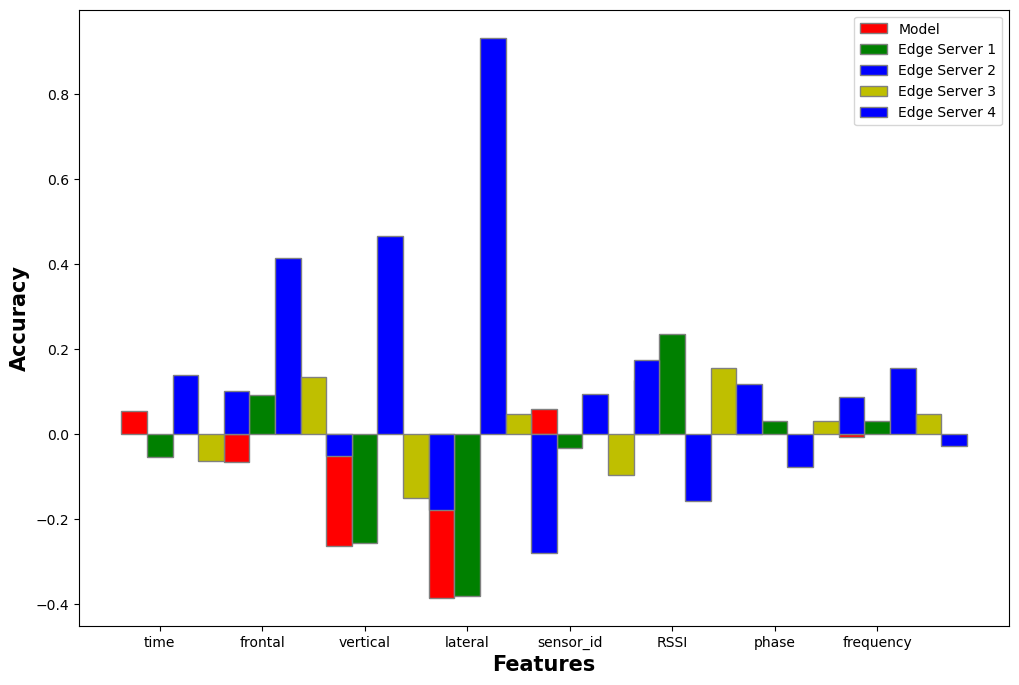

In [21]:
activity_wsdata()

In [22]:
def ALEdata():
    print("-------------- ALE Sensor Data Dataset Info -------------------- ")
    df = pd.read_csv('C:/Users/m/Downloads/data/ALE in Sensor.csv')
    trainingAccuacy, edgeServer1Accuracy, edgeServer2Accuracy, edgeServer3Accuracy, edgeServer4Accuracy = loadData(df,'sd_ale',"Continuous")
#     training_B, edgeServer1_B, edgeServer2_B = loadData (df,'sd_ale',"Continuous")
#     displayInfo(training_B, edgeServer1_B, edgeServer2_B)

    return 

-------------- ALE Sensor Data Dataset Info -------------------- 
Actual Model 

              anchor_ratio  trans_range  node_density  iterations       ale
anchor_ratio      1.000000    -0.121835     -0.094082    0.005564 -0.077263
trans_range      -0.121835     1.000000     -0.220530   -0.181844  0.072425
node_density     -0.094082    -0.220530      1.000000   -0.087382 -0.649692
iterations        0.005564    -0.181844     -0.087382    1.000000 -0.344973
ale              -0.077263     0.072425     -0.649692   -0.344973  1.000000 

anchor_ratio   -0.092168
trans_range    -0.054378
node_density   -0.678988
iterations     -0.131837
ale             0.736674
dtype: float64
-----------------------------------------------------
Edge Server 1 Model 

              anchor_ratio  trans_range  node_density  iterations       ale
anchor_ratio      1.000000     0.275519     -0.341280    0.241731 -0.140306
trans_range       0.275519     1.000000     -0.575334   -0.305662  0.336079
node_density     

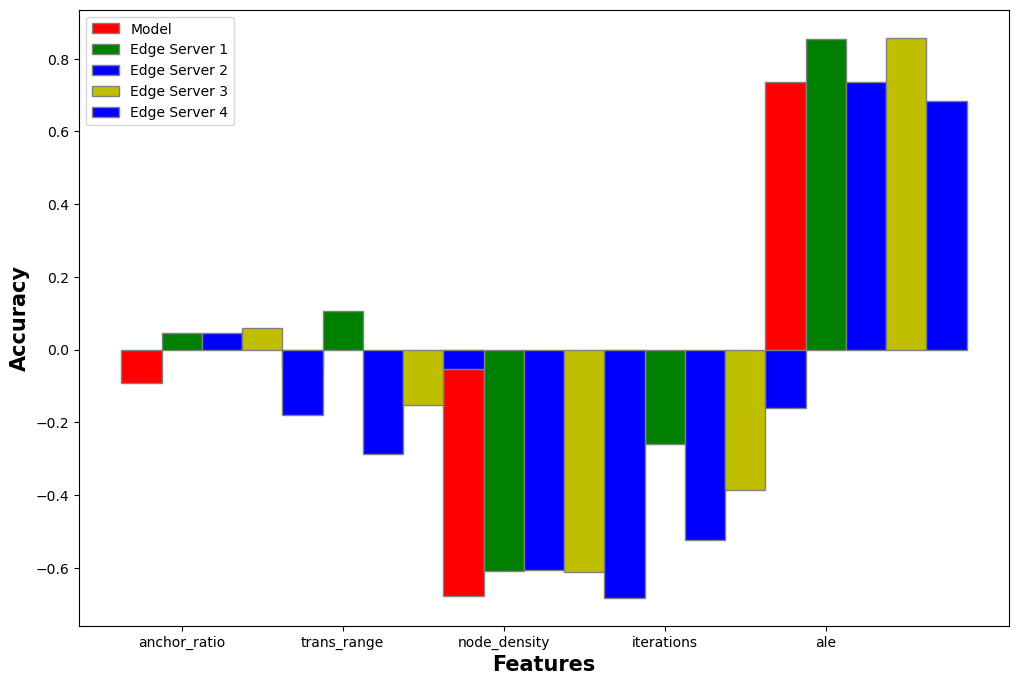

In [23]:
ALEdata()

In [24]:
def banknote_data():
    print("-------------- Bank Note Authentication Dataset Info -------------------- ")
    df = pd.read_csv('C:/Users/m/Downloads/data/banknote_authen.txt')
    trainingAccuacy, edgeServer1Accuracy, edgeServer2Accuracy, edgeServer3Accuracy, edgeServer4Accuracy = loadData(df,'class',"Categorical")
#     training_A, edgeServer1_A, edgeServer2_A = loadData (df,'class',"Categorical")
#     training_B, edgeServer1_B, edgeServer2_B = loadData (df,'class',"Categorical")
#     displayInfo(trainingAccuacy, edgeServer1Accuracy, edgeServer2Accuracy)
#     print("------------------------------------------------------------")
#     displayInfo(training_A, edgeServer1_A, edgeServer2_A)
#     print("------------------------------------------------------------")
#     displayInfo(training_B, edgeServer1_B, edgeServer2_B)
#     return 

-------------- Bank Note Authentication Dataset Info -------------------- 
Actual Model 

          variance  skewnwss  curtosis   entropy
variance  1.000000  0.255692 -0.369567  0.288237
skewnwss  0.255692  1.000000 -0.780922 -0.533946
curtosis -0.369567 -0.780922  1.000000  0.314028
entropy   0.288237 -0.533946  0.314028  1.000000 

variance   -0.720508
skewnwss   -0.444457
curtosis    0.142341
entropy    -0.018594
dtype: float64
-----------------------------------------------------
Edge Server 1 Model 

          variance  skewnwss  curtosis   entropy
variance  1.000000  0.366117 -0.465828  0.156294
skewnwss  0.366117  1.000000 -0.797505 -0.509210
curtosis -0.465828 -0.797505  1.000000  0.357137
entropy   0.156294 -0.509210  0.357137  1.000000
variance   -0.718935
skewnwss   -0.531528
curtosis    0.221371
entropy     0.024810
dtype: float64
-----------------------------------------------------
Edge Server 2 Model 

          variance  skewnwss  curtosis   entropy
variance  1.000000 

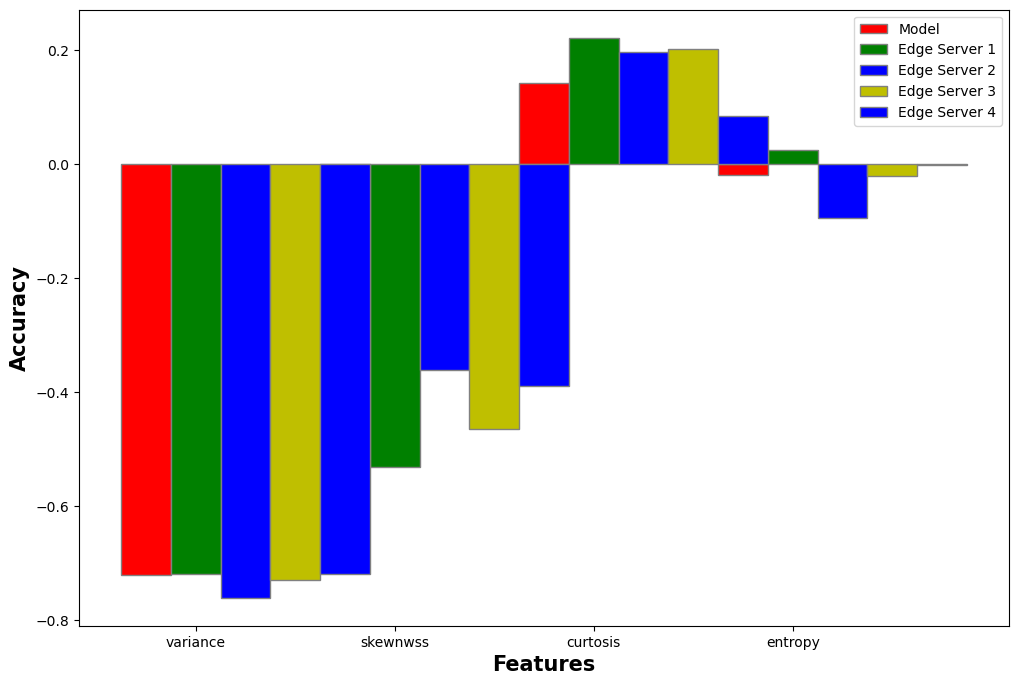

In [25]:
banknote_data()

In [ ]:
def e_grid():
    print("-------------- Simulated Electrical Grid Dataset Info -------------------- ")
    df = pd.read_csv('C:/Users/moyin/Downloads/data/UCI_named.csv')
    trainingAccuacy, edgeServer1Accuracy, edgeServer2Accuracy, edgeServer3Accuracy, edgeServer4Accuracy = loadData(df,'stabf', 'Categorical')
#     training_A, edgeServer1_A, edgeServer2_A = loadData (df,'stabf', 'Categorical')
#     training_B, edgeServer1_B, edgeServer2_B = loadData (df,'stabf', 'Categorical')
#     displayInfo(trainingAccuacy, edgeServer1Accuracy, edgeServer2Accuracy)
#     print("------------------------------------------------------------") 
#     displayInfo(training_A, edgeServer1_A, edgeServer2_A)
#     print("------------------------------------------------------------")
#     displayInfo(training_B, edgeServer1_B, edgeServer2_B)
#     return 

In [ ]:
e_grid()

In [ ]:
# if __name__=="__main__":
#     Occupancy()
#     #powerConsumption()
    #accelerometer_w()
    #activity_wsdata()
    #ALEdata()
    #banknote_data()
    #RSSI()
    #e_grid()